1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
import statsmodels.formula.api as smf

In [8]:
# Importing Dataset
data = pd.read_csv(r"C:\Users\niveditha\Downloads\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [11]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\niveditha\AppData\Local\Temp\ipykernel_15140\1991846704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Delivery Time"])
C:\Users\niveditha\AppData\Local\Temp\ipykernel_15140\1991846704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

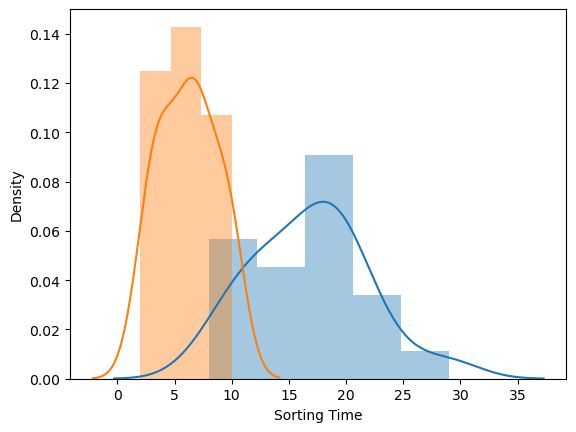

In [12]:
sns.distplot(data["Delivery Time"])
sns.distplot(data["Sorting Time"])

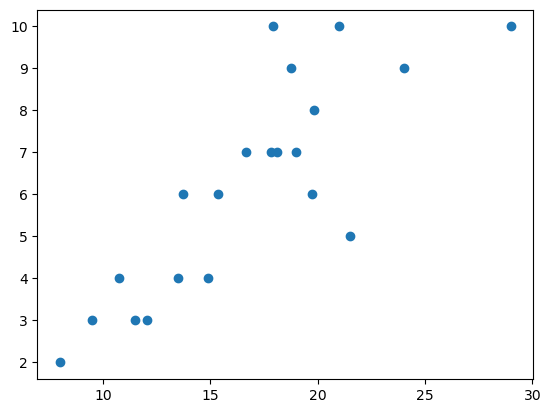

In [13]:
plt.scatter(data["Delivery Time"], data["Sorting Time"])

In [14]:
data=data.rename({"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"},axis=1)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
model = smf.ols("DeliveryTime~SortingTime",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        14:28:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

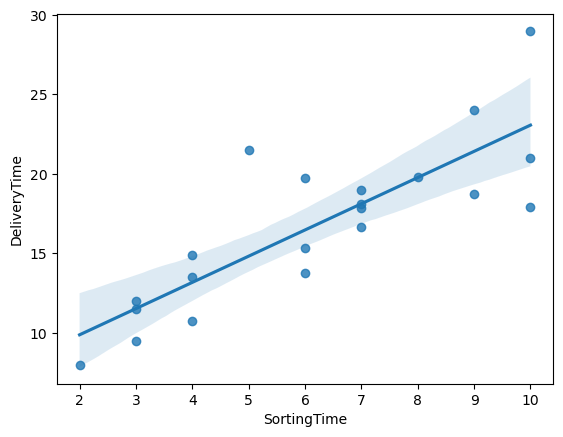

In [16]:
sns.regplot(x="SortingTime",y="DeliveryTime", data=data)

In [17]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [18]:
model.tvalues, model.pvalues

(Intercept      3.823349
 SortingTime    6.387447
 dtype: float64,
 Intercept      0.001147
 SortingTime    0.000004
 dtype: float64)

In [19]:
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

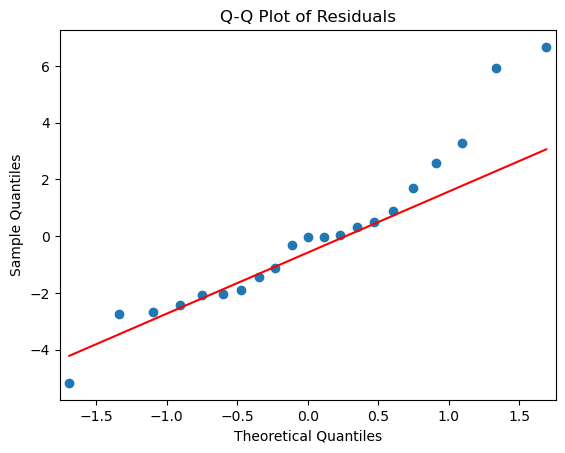

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [21]:
# Sqrt Transformations
data1=pd.merge(np.sqrt(data["SortingTime"]).reset_index(),data["DeliveryTime"].reset_index())
data1.drop("index",axis=1)

,SortingTime,DeliveryTime
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [22]:
# Square Transformations
import warnings
warnings.filterwarnings("ignore")
data2=np.square((data["SortingTime"]),(data["DeliveryTime"]))
data2

0     100.0
1      16.0
2      36.0
3      81.0
4     100.0
5      36.0
6      49.0
7       9.0
8     100.0
9      81.0
10     64.0
11     16.0
12     49.0
13      9.0
14      9.0
15     16.0
16     36.0
17     49.0
18      4.0
19     49.0
20     25.0
Name: SortingTime, dtype: float64

In [23]:
#Log Transformation
data3=np.log((data["SortingTime"]),(data["DeliveryTime"]))
data3

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: SortingTime, dtype: float64

In [24]:
import sklearn

In [25]:
from sklearn import preprocessing
preprocessing.PowerTransformer()

PowerTransformer()

In [26]:
import numpy as np 
print(np.log(2))
print(np.sqrt(25))
print(np.square(4))

0.6931471805599453
5.0
16


In [27]:
model1=smf.ols("DeliveryTime~SortingTime", data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           2.61e-06
Time:                        14:28:39   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
SortingTime     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

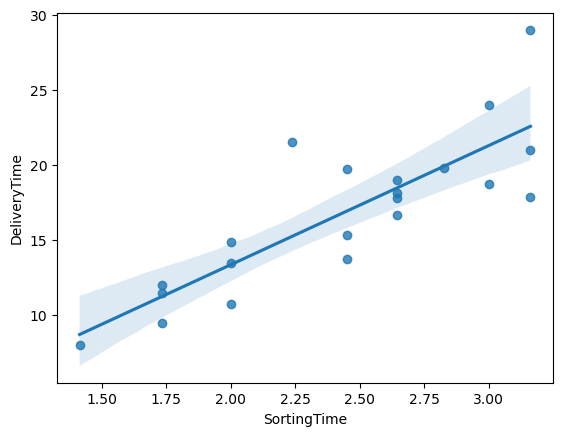

In [28]:
sns.regplot(x="SortingTime",y="DeliveryTime", data=data1)

In [29]:
model1.params

Intercept     -2.518837
SortingTime    7.936591
dtype: float64

In [30]:
model1.tvalues,model1.pvalues

(Intercept     -0.840911
 SortingTime    6.592434
 dtype: float64,
 Intercept      0.410857
 SortingTime    0.000003
 dtype: float64)

In [31]:
(model1.rsquared,model1.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

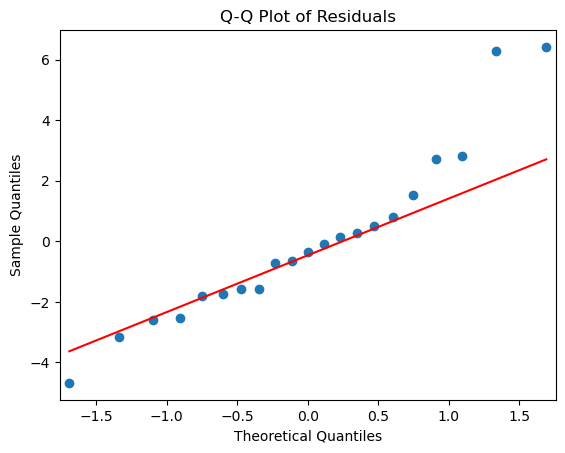

In [32]:
qqplot1=sm.qqplot(model1.resid,line='q')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [33]:
# Data Prediction
y=model1.predict(data1["SortingTime"])
y

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [34]:
newdata=pd.Series([4,6,8,10])
data3=pd.DataFrame(newdata,columns=["SortingTime"])
data3

,SortingTime
0,4
1,6
2,8
3,10


In [35]:
model.predict(data3)

0    13.178814
1    16.476853
2    19.774893
3    23.072933
dtype: float64

In [36]:
model1.predict(data3)

0    29.227526
1    45.100708
2    60.973889
3    76.847071
dtype: float64

Salary_hike -> Build a prediction model for Salary_hike

In [37]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
import statsmodels.formula.api as smf

In [38]:
data=pd.read_csv(r"C:\Users\niveditha\Downloads\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [39]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: xlabel='Salary', ylabel='Density'>

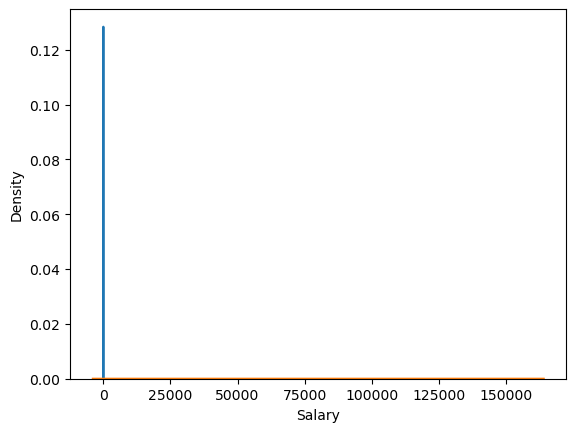

In [40]:
sns.distplot(data["YearsExperience"])
sns.distplot(data["Salary"])

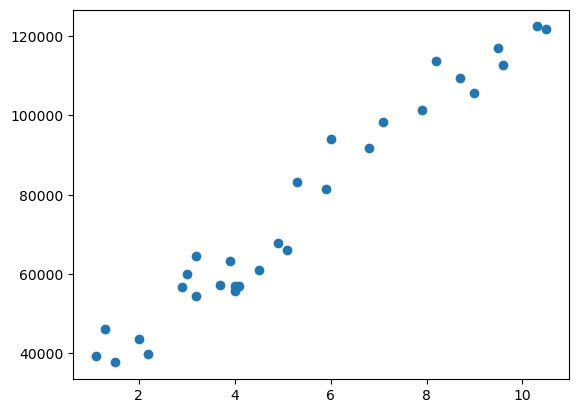

In [41]:
plt.scatter(data["YearsExperience"],data["Salary"])

In [42]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [43]:
model=smf.ols("Salary~YearsExperience",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        14:31:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

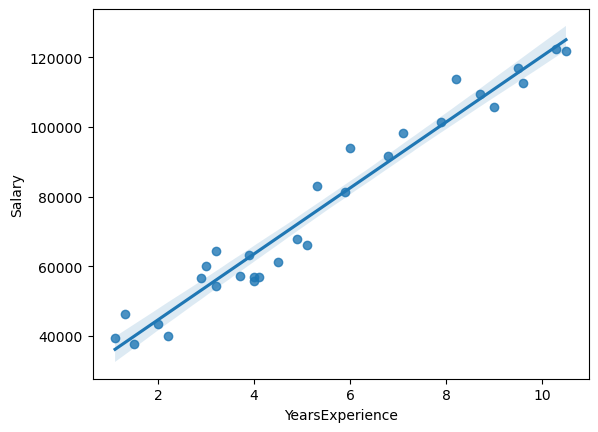

In [44]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [45]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [46]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [47]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

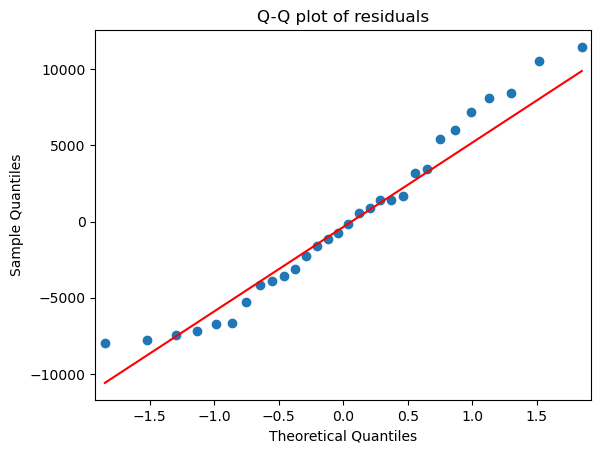

In [48]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [49]:
# Sqrt Transformations
data1=pd.merge(np.sqrt(data["Salary"]).reset_index(),data["YearsExperience"].reset_index())
data1.drop("index",axis=1)

,Salary,YearsExperience
0,198.350700,1.1
1,214.953483,1.3
2,194.244691,1.5
3,208.626460,2.0
4,199.727314,2.2
5,237.995798,2.9
6,245.254969,3.0
7,233.334524,3.2
8,253.860198,3.2
9,239.142217,3.7


In [50]:
# Square Transformations
import warnings
warnings.filterwarnings("ignore")
data2=np.square((data["Salary"]),(data["YearsExperience"]))
data2

0     1.547872e+09
1     2.134902e+09
2     1.423628e+09
3     1.894426e+09
4     1.591292e+09
5     3.208316e+09
6     3.618022e+09
7     2.964258e+09
8     4.153158e+09
9     3.270582e+09
10    3.996516e+09
11    3.112970e+09
12    3.244100e+09
13    3.258241e+09
14    3.734554e+09
15    4.615572e+09
16    4.359829e+09
17    6.903616e+09
18    6.619938e+09
19    8.824724e+09
20    8.415861e+09
21    9.657583e+09
22    1.026210e+10
23    1.295317e+10
24    1.197514e+10
25    1.114756e+10
26    1.368175e+10
27    1.268664e+10
28    1.497956e+10
29    1.485278e+10
Name: Salary, dtype: float64

In [51]:
#Log Transformation
data3=np.log((data["Salary"]),(data["YearsExperience"]))
data3

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

In [52]:
#Predict Salary
y1=model.predict(data["YearsExperience"])
data2=pd.merge(data.reset_index(),y1.reset_index())
data2=data2.drop("index",axis=1)
data2.columns=["YearsExp","Salary","Predicted Salary"]
data2

,YearsExp,Salary,Predicted Salary
0,10.580073,39343.0,125773.494689
1,10.740843,46205.0,127292.764650
2,10.538237,37731.0,125378.145776
3,10.681091,43525.0,126728.105477
4,10.593906,39891.0,125904.212864
5,10.944506,56642.0,129217.369889
6,11.004597,60150.0,129785.224579
7,10.904946,54445.0,128843.531821
8,11.073567,64445.0,130436.995137
9,10.954117,57189.0,129308.191707


In [53]:
newdata1=pd.Series([2.1, 3.5, 5.7, 7.3, 10.6])
data3=pd.DataFrame(newdata1, columns=["YearsExperience"])
data3

,YearsExperience
0,2.1
1,3.5
2,5.7
3,7.3
4,10.6


In [54]:
model.predict(data3)

0     45637.121074
1     58867.068324
2     79656.985431
3     94776.925145
4    125961.800806
dtype: float64